# Session 7: Analyze financial data, handle data with different year-ends.

## [EAA - ARC Python Primer for Accounting Research](https://martien.netlify.app/book/example/)

### Preparation ###


**Complete the cells below so that by the start of the Thursday session you have an understanding of munging data for accounting research**

---

#### Introduction - preparation
---

The cells below demonstrate how use Use Pandas to analyze financial data, handle data with different year-ends, etc.

By the end of this session you are able to craft your own panel data set for accounting research.

#### Price data 

You will download prices of us Bank Holding Companies using the [**yfinance**](https://pypi.org/project/yfinance/) module. To install this module using Anaconda prompt, run `pip install yfinance`.

#### Accounting data 

You will also use the bank holding company data used in the [first assignment](https://github.com/blucap/EEA_Python_Primer/blob/master/assignment_1_solutions.ipynb). 

For this Session you need to:  

- **Download the BHC data** for [2019](https://www.ffiec.gov/npw/FinancialReport/FinancialDataDownload?selectedyear=2019),  [2020](https://www.ffiec.gov/npw/FinancialReport/FinancialDataDownload?selectedyear=2020), and  [2021](https://www.ffiec.gov/npw/FinancialReport/FinancialDataDownload?selectedyear=2021). 
- **Save** the files to a folder on your drive, e.g. `D:/users/my_user_name_here/EAA_python/code/`. The files are zip- compressed (`BHCF20200331.ZIP`, ...,  `BHCF20211231.ZIP`) - **but there is no need to extract the contents of the zip files**. Pandas will do that for you.
- **Save** the file `ticker_rssd.csv` (see [GitHub](https://github.com/blucap/EEA_Python_Primer)) to the same folder.

Run the cells below after setting the correct source folder of your files, i.e. replace `my_user_name_here` with something that works on your machine. See this [link](https://www.youtube.com/watch?v=hUW5MEKDtMM) and this [link](https://www.youtube.com/watch?v=7ABkcHLdG_A) for explanations of folders and directories.

Learning objectives:

- Obtaining price data from Yahoo, 
- Determining cumulative returns for a sample of Bank Holding Companies,
- Learning about time series for different year-ends, quarter-ends,
- Creating a data frame of cumulative returns that we will merge with accounting data of Bank Holding Companies,
- Preparing data from Bank Holding Companies for analysis
- Creating lagged data
- Creating row-differences
- Merging accouting and price data


---

**Let's start!**

In [1]:
# the familiar preamble
import pandas as pd
import numpy as np

# For this session
import glob # for iterating through a folder
import os # To set our working folder
from pandas.tseries.offsets import MonthEnd # To set dates to the end of the month
import yfinance as yf  # This gets us prices from Yahoo finance. See https://pypi.org/project/yfinance/

if os.name=='nt':  # for Windows users
    os.chdir('D:/users/my_user_name_here/EAA_python/data/')  # note the forward slashes, change 'martien' to your user name
else:
    os.chdir('/home/martien/EAA_python/data/')  # For Linux or Mac

---
### Loading price data for U.S. banks using yfinance ###

For this course, I decided to rely on publicly available data only. So, for price data I rely on [yfinance](https://pypi.org/project/yfinance/) instead of WRDS-CRSP. 

The price data allows me to show some powerful pandas functions, such as determining cumulative returns and finding prices at the end of quarter. 

The [yfinance](https://pypi.org/project/yfinance/) module returns a data frame with financials for a single firm, or for a list of firms. With the bank holding company data available for the years 2019-2021, we will only load price data for these years.

The cells below retrieve that data for a long list of bank tickers (`bank_list`) that I compiled for you. 

In [2]:
bank_list = ['AAIC', 'ABCB', 'ABCW', 'ABTX', 'ACBI', 'ACFC', 'ACNB', 'AF', 'AI', 'AIG', 'ALTA', 'AMNB', 'AMP', 'AMRB', 'AMTBB', 'ANCB', 'ANCX', 'AROW', 'ASB', 'ASBB', 'ASBI', 'ASRV', 'ATLO', 'AUB', 'AUBN', 'AVNU', 'AX', 'BAC', 'BANC', 'BANF', 'BANR', 'BBCN', 'BBT', 'BCBP', 'BDGE', 'BEN', 'BFIN', 'BFST', 'BHB', 'BHBK', 'BHLB', 'BK', 'BKJ', 'BKMU', 'BKSC', 'BKU', 'BLMT', 'BMRC', 'BMTC', 'BNCL', 'BNCN', 'BNK', 'BOCH', 'BOFI', 'BOH', 'BOKF', 'BPFH', 'BPOP', 'BRKL', 'BSRR', 'BSVN', 'BUSE', 'BWB', 'BWFG', 'BXS', 'BY', 'BYBK', 'BYLK', 'C', 'CAC', 'CACB', 'CADE', 'CARO', 'CARV', 'CASH', 'CASS', 'CATC', 'CATY', 'CBAN', 'CBF', 'CBFV', 'CBNJ', 'CBNK', 'CBSH', 'CBTX', 'CBU', 'CCBG', 'CCNE', 'CFB', 'CFCB', 'CFFI', 'CFFN', 'CFG', 'CFNB', 'CFNL', 'CFR', 'CHCO', 'CHEV', 'CHFC', 'CHFN', 'CHMG', 'CIT', 'CIVB', 'CIZN', 'CLBH', 'CLBK', 'CMA', 'CNBKA', 'CNOB', 'COB', 'COBZ', 'COF', 'COLB', 'CPF', 'CSBK', 'CSFL', 'CSTR', 'CTBI', 'CUBI', 'CUBN', 'CUNB', 'CVBF', 'CVCY', 'CVLY', 'CWBC', 'CZNC', 'CZWI', 'DCOM', 'DFS', 'DNBF', 'EBMT', 'EBSB', 'EBTC', 'EFSC', 'EGBN', 'EMCF', 'ENFC', 'EQBK', 'ESSA', 'ESXB', 'ETFC', 'EVBN', 'EVBS', 'EVER', 'EWBC', 'FAF', 'FBC', 'FBIZ', 'FBK', 'FBMS', 'FBNC', 'FBNK', 'FBP', 'FBSS', 'FCB', 'FCBC', 'FCCO', 'FCCY', 'FCF', 'FCFP', 'FCLF', 'FCNCA', 'FCVA', 'FDEF', 'FFBC', 'FFIC', 'FFIN', 'FFKT', 'FFNW', 'FFWM', 'FGBI', 'FHN', 'FIBK', 'FISI', 'FITB', 'FLIC', 'FMAO', 'FMBH', 'FMBI', 'FMD', 'FMER', 'FMNB', 'FNB', 'FNBC', 'FNBG', 'FNCB', 'FNFG', 'FNLC', 'FNWB', 'FRBK', 'FRME', 'FSB', 'FSBK', 'FSFG', 'FULT', 'FUNC', 'FUSB', 'FXCB', 'GABC', 'GBCI', 'GBNK', 'GFED', 'GLBZ', 'GNBC', 'GNTY', 'GSBC', 'GWB', 'HAFC', 'HBAN', 'HBCP', 'HBHC', 'HBMD', 'HBNC', 'HBT', 'HEOP', 'HFBC', 'HFFC', 'HFWA', 'HMNF', 'HMPR', 'HMST', 'HOMB', 'HONE', 'HOPE', 'HTBI', 'HTBK', 'HTH', 'HTLF', 'HWBK', 'HWC', 'IBCP', 'IBKC', 'IBOC', 'IBTX', 'ICBK', 'INBK', 'INDB', 'IROQ', 'ISBC', 'ISTR', 'JAXB', 'JPM', 'JXSB', 'KEY', 'KRNY', 'LARK', 'LBAI', 'LCNB', 'LEVL', 'LION', 'LKFN', 'LMST', 'LOB', 'LSBG', 'LTXB', 'MBCN', 'MBFI', 'MBIN', 'MBNAB', 'MBRG', 'MBTF', 'MBVT', 'MBWM', 'MCBC', 'METR', 'MFNC', 'MFSF', 'MGYR', 'MLVF', 'MNRK', 'MOFG', 'MPB', 'MRLN', 'MSBI', 'MSFG', 'MSL', 'MTB', 'MVBF', 'MYFW', 'NBBC', 'NBHC', 'NBN', 'NBTB', 'NCBS', 'NCOM', 'NFBK', 'NKSH', 'NPBC', 'NRIM', 'NTRS', 'NVSL', 'NWBI', 'NWFL', 'NYCB', 'OBNK', 'OCFC', 'OFG', 'OKSB', 'OLBK', 'ONB', 'OPHC', 'OPOF', 'ORIT', 'ORRF', 'OSBC', 'OSHC', 'OVBC', 'OVLY', 'OZK', 'OZRK', 'PACW', 'PB', 'PBCT', 'PBHC', 'PBIB', 'PBIP', 'PBNC', 'PCBK', 'PCSB', 'PEBK', 'PEBO', 'PFBI', 'PFBX', 'PFC', 'PFG', 'PFIS', 'PFS', 'PGC', 'PKBK', 'PLBC', 'PMBC', 'PNBK', 'PNC', 'PNFP', 'PPBI', 'PRK', 'PROV', 'PSTB', 'PUB', 'PULB', 'PVBC', 'PVTB', 'PWOD', 'QCRH', 'RBB', 'RBCAA', 'RBNC', 'RBPAA', 'RF', 'RJF', 'RNST', 'RRBI', 'RVSB', 'SAL', 'SASR', 'SBBX', 'SBCF', 'SBFG', 'SBSI', 'SBT', 'SCHW', 'SCNB', 'SEIC', 'SF', 'SFBS', 'SFNC', 'SFST', 'SGB', 'SHBI', 'SIFI', 'SIVB', 'SLCT', 'SMBC', 'SMBK', 'SMMF', 'SNBC', 'SNV', 'SOCB', 'SONA', 'SPFI', 'SRCE', 'SSB', 'SSFN', 'STBA', 'STBZ', 'STI', 'STL', 'STT', 'SVBI', 'SYBT', 'SYF', 'TBBK', 'TBK', 'TBNK', 'TCB', 'TCBI', 'TCBK', 'TCF', 'TCFC', 'TFC', 'THFF', 'TLMR', 'TMP', 'TRCB', 'TRMK', 'TROW', 'TRST', 'TSBK', 'TSC', 'UBCP', 'UBFO', 'UBNK', 'UBOH', 'UBSH', 'UBSI', 'UCBA', 'UCBI', 'UCFC', 'UMBF', 'UMPQ', 'UNB', 'UNTY', 'USB', 'USBI', 'UVSP', 'VBFC', 'VBTX', 'VLY', 'WABC', 'WAFD', 'WAL', 'WASH', 'WBB', 'WBS', 'WFBI', 'WFC', 'WFD', 'WIBC', 'WNEB', 'WSBC', 'WSBF', 'WSFS', 'WTBA', 'WTFC', 'WVFC', 'XBKS', 'YCB', 'YDKN', 'ZION']
print('Banks :', len(bank_list))

Banks : 449


In [71]:
dfy = yf.download(bank_list, start='2019-01-01', end='2021-12-31', progress=True)

[*********************100%***********************]  449 of 449 completed

125 Failed downloads:
- WIBC: No data found for this date range, symbol may be delisted
- MSL: No data found, symbol may be delisted
- MFNC: No data found, symbol may be delisted
- HEOP: No data found for this date range, symbol may be delisted
- SLCT: No data found, symbol may be delisted
- FBNK: No data found, symbol may be delisted
- PFBI: No data found, symbol may be delisted
- FCVA: No data found for this date range, symbol may be delisted
- UCBA: No data found for this date range, symbol may be delisted
- FNFG: No data found for this date range, symbol may be delisted
- UCFC: No data found, symbol may be delisted
- PSTB: No data found for this date range, symbol may be delisted
- HFBC: No data found, symbol may be delisted
- CBNJ: No data found for this date range, symbol may be delisted
- BPFH: No data found, symbol may be delisted
- FCFP: No data found for this date range, symbol may be delisted
- FSBK: N

**Note that `dfy` has a multi-index set of columns**

This is a great feature of Pandas: it allows us to select a set of columns in one go.

In [72]:
dfy.head()

Adj Close                                             \
                         AAIC       ABCB ABCW       ABTX       ACBI ACFC   
Date                                                                       
2018-12-31 00:00:00  6.175004  30.337460  NaN  31.558247  16.370001  NaN   
2019-01-02 00:00:00  6.234708  30.605679  NaN  32.611168  16.959999  NaN   
2019-01-03 00:00:00  6.234708  30.500307  NaN  32.708656  16.990000  NaN   
2019-01-04 00:00:00  6.490578  31.688137  NaN  33.878555  17.600000  NaN   
2019-01-07 00:00:00  6.754978  32.943005  NaN  34.132042  17.770000  NaN   

                                                   ...    Volume           \
                          ACNB  AF  AI        AIG  ...      WSBC     WSBF   
Date                                               ...                      
2018-12-31 00:00:00  35.461575 NaN NaN  35.953957  ...  102500.0  78700.0   
2019-01-02 00:00:00  34.919487 NaN NaN  36.145546  ...  128400.0  34300.0   
2019-01-03 00:00:00  35.371227 NaN NaN  35.351837  ...  115300.0  56500.0   
2019-01-04 00:00:00  35.091148 NaN NaN  36.656433  ...   91000.0  73000.0   
2019-01-07 00:00:00  34.576160 NaN NaN  36.866268  ...   70900.0  33200.0   

                                                                        \
                         WSFS     WTBA      WTFC    WVFC XBKS YCB YDKN   
Date                                                                     
2018-12-31 00:00:00  125000.0  28300.0  414600.0  7700.0  NaN NaN  NaN   
2019-01-02 00:00:00  165900.0  74400.0  698000.0   200.0  NaN NaN  NaN   
2019-01-03 00:00:00  145500.0  24300.0  528400.0  1200.0  NaN NaN  NaN   
2019-01-04 00:00:00  178300.0  46900.0  543200.0   900.0  NaN NaN  NaN   
2019-01-07 00:00:00  147600.0  59800.0  347100.0   100.0  NaN NaN  NaN   

                                
                          ZION  
Date                            
2018-12-31 00:00:00  2575600.0  
2019-01-02 00:00:00  2234100.0  
2019-01-03 00:00:00  2078400.0  
2019-01-04 00:00:00  2370500.0  
2019-01-07 00:00:00  2459700.0  

[5 rows x 2694 columns]

We only need `Adj Close`:

In [73]:
df_close = dfy['Adj Close'].copy()
df_close.head(5)

,AAIC,ABCB,ABCW,ABTX,ACBI,ACFC,ACNB,AF,AI,AIG,...,WSBC,WSBF,WSFS,WTBA,WTFC,WVFC,XBKS,YCB,YDKN,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31 00:00:00,6.175004,30.337460,NaN,31.558247,16.370001,NaN,35.461575,NaN,NaN,35.953957,...,32.412113,13.240709,36.536983,16.978306,63.477257,13.597441,NaN,NaN,NaN,37.240482
2019-01-02 00:00:00,6.234708,30.605679,NaN,32.611168,16.959999,NaN,34.919487,NaN,NaN,36.145546,...,33.101170,13.248610,36.951408,17.218441,64.861565,13.597441,NaN,NaN,NaN,38.008324
2019-01-03 00:00:00,6.234708,30.500307,NaN,32.708656,16.990000,NaN,35.371227,NaN,NaN,35.351837,...,32.897987,13.169606,37.211624,17.147285,64.050079,13.671090,NaN,NaN,NaN,37.798077
2019-01-04 00:00:00,6.490578,31.688137,NaN,33.878555,17.600000,NaN,35.091148,NaN,NaN,36.656433,...,33.896233,13.359213,37.732075,17.787642,65.921257,13.634265,NaN,NaN,NaN,38.958996
2019-01-07 00:00:00,6.754978,32.943005,NaN,34.132042,17.770000,NaN,34.576160,NaN,NaN,36.866268,...,33.958065,13.280210,37.510391,17.858789,66.169472,13.634265,NaN,NaN,NaN,39.114380


**Note that there are many empty columns**

Let's delete columns without any price value using `dropna` and `axis=1` for columns, instead of the default `axis=0`.

In [74]:
df_close.shape

(757, 449)

In [75]:
df_close.dropna(axis=1, inplace=True, how='all')
df_close.shape

(757, 324)

In [8]:
df_close.head(5)

,AAIC,ABCB,ABTX,ACBI,ACNB,AI,AIG,AMNB,AMP,ANCX,...,WBS,WFC,WNEB,WSBC,WSBF,WSFS,WTBA,WTFC,WVFC,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31 00:00:00,6.175004,30.337460,31.558247,16.370001,35.461575,NaN,35.953953,26.479399,97.236290,21.330000,...,43.785351,42.016514,9.388006,32.412109,13.240712,36.536983,16.978306,63.477257,13.597441,37.717342
2019-01-02 00:00:00,6.234708,30.605679,32.611164,16.959999,34.919487,NaN,36.145542,27.274412,100.580917,21.950001,...,44.567081,42.800674,9.322553,33.101170,13.248610,36.951408,17.218435,64.861565,13.597441,38.495026
2019-01-03 00:00:00,6.234708,30.500307,32.708652,16.990000,35.371231,NaN,35.351841,27.337650,97.916397,22.190001,...,43.945251,42.463310,9.266449,32.897991,13.169611,37.211639,17.147285,64.050079,13.671090,38.282089
2019-01-04 00:00:00,6.490578,31.688137,33.878563,17.600000,35.091152,NaN,36.656441,27.970049,103.161583,23.040001,...,45.277737,43.721615,9.509562,33.896233,13.359212,37.732067,17.787642,65.921257,13.634265,39.457855
2019-01-07 00:00:00,6.754978,32.943005,34.132042,17.770000,34.576160,NaN,36.866268,28.421762,103.636719,23.650000,...,44.584835,43.438950,9.472162,33.958069,13.280210,37.510399,17.858795,66.169472,13.634265,39.615250


In [9]:
df_close.tail(5)

,AAIC,ABCB,ABTX,ACBI,ACNB,AI,AIG,AMNB,AMP,ANCX,...,WBS,WFC,WNEB,WSBC,WSBF,WSFS,WTBA,WTFC,WVFC,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-23 00:00:00,3.56,49.209999,41.919998,28.330000,30.25,34.250000,56.570000,38.509998,302.279999,NaN,...,54.911530,48.360001,8.61,34.500000,20.981201,50.459999,31.200001,89.389999,15.2,62.360001
2021-12-27 00:00:00,3.54,49.750000,42.660000,28.870001,31.01,33.200001,56.900002,38.919998,307.390015,NaN,...,55.825397,48.770000,8.86,34.950001,21.145948,51.110001,31.420000,90.989998,15.1,63.009998
2021-12-28 00:00:00,3.53,50.070000,42.840000,29.299999,31.51,32.389999,56.669998,38.700001,305.670013,NaN,...,55.795597,48.419998,8.69,35.029999,21.136257,51.430000,31.129999,91.309998,15.1,63.110001
2021-12-29 00:00:00,3.50,50.250000,43.080002,28.900000,31.52,31.459999,56.779999,39.099998,305.410004,NaN,...,56.331997,48.450001,8.66,35.020000,21.252552,51.080002,31.299999,92.099998,15.2,63.450001
2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

- The data looks fine, but the shape of the data should change: tickers and dates should be the index
- Using the date variable we can create variables that are based on the date, one for the year, one for the quarter number [1,2,3,4], and one for the quarter '2021Q1'. These variables facilitate grouping.
- The main date variable should be named `datadate`.
- The price variable should be renamed to `prc`.

To reshape the data frame we use `melt`, see [Session 6](https://martien.netlify.app/slides/session6/). 

In [10]:
# Melt
dfm = pd.melt(df_close.reset_index(), id_vars=['Date'], var_name='ticker', value_name='prc')
dfm.dropna(inplace=True)
dfm.rename(columns = {'Date': 'datadate'} , inplace=True)
dfm.head()

,datadate,ticker,prc
0,2018-12-31,AAIC,6.175004
1,2019-01-02,AAIC,6.234708
2,2019-01-03,AAIC,6.234708
3,2019-01-04,AAIC,6.490578
4,2019-01-07,AAIC,6.754978


In [11]:
# Adding additional date variables using datadate 

dfm['year']       = dfm.datadate.dt.year
dfm['quarter_no'] = dfm.datadate.dt.quarter
dfm['quarter']    = pd.PeriodIndex(dfm.datadate, freq='Q')  # See https://stackoverflow.com/questions/50459301/how-to-convert-dates-to-quarters-in-python

dfm.set_index(['ticker', 'datadate'], inplace=True)

**Presto** we now have a properly designed *long* data frame that we can use for various analyses.

In [12]:
dfm.head(5)

prc  year  quarter_no quarter
ticker datadate                                      
AAIC   2018-12-31  6.175004  2018           4  2018Q4
       2019-01-02  6.234708  2019           1  2019Q1
       2019-01-03  6.234708  2019           1  2019Q1
       2019-01-04  6.490578  2019           1  2019Q1
       2019-01-07  6.754978  2019           1  2019Q1

---

**Cumulative returns**

In the absence of readily available dividend data we rely on price changes for determining returns. 

To determine price changes, use Pandas `pct_change` function.

Let's do that for Bank of America, with ticker `BAC`.

In [77]:
df_boa = dfm['prc'].loc['BAC'].pct_change()
df_boa.head()

datadate
2019-01-02         NaN
2019-01-03   -0.016026
2019-01-04    0.041531
2019-01-07   -0.000782
2019-01-08   -0.001956
Name: prc, dtype: float64

For the calculation of cumulative returns we should add one (1) to the price changes:

In [14]:
df_boa += 1
df_boa

datadate
2018-12-31         NaN
2019-01-02    1.012987
2019-01-03    0.983974
2019-01-04    1.041531
2019-01-07    0.999218
                ...   
2021-12-22    1.002037
2021-12-23    1.003162
2021-12-27    1.004953
2021-12-28    1.001344
2021-12-29    0.998434
Name: prc, Length: 756, dtype: float64

Use Pandas `cumprod` to determine the cumulative product of the price changes per day, then take away 1.

In [78]:
df_boa_cumret_all = df_boa.cumprod()-1

<AxesSubplot:xlabel='datadate'>

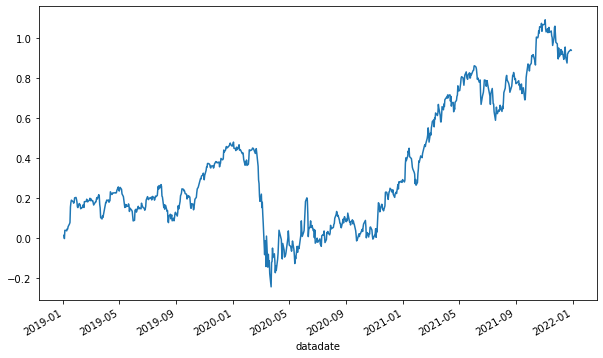

In [16]:
df_boa_cumret_all.plot(figsize=(10,6))

Apparently BoA performed well!

---

**Resampling the data frequency to quarterly**

What if we are not interested in daily observations, but only in end-of quarter data?

Here again Pandas shows its strength, you can resample the data to a different frequency and tell pandas to `take` the last observation of each quarter.

In [17]:
df_boa_cumret_qtr = df_boa_cumret_all.resample('Q').last().fillna(0)
df_boa_cumret_qtr

datadate
2018-12-31    0.000000
2019-03-31    0.125441
2019-06-30    0.189349
2019-09-30    0.204206
2019-12-31    0.461902
2020-03-31   -0.113168
2020-06-30   -0.000982
2020-09-30    0.020378
2020-12-31    0.291840
2021-03-31    0.657193
2021-06-30    0.773422
2021-09-30    0.835255
2021-12-31    0.938790
Freq: Q-DEC, Name: prc, dtype: float64

<AxesSubplot:xlabel='datadate'>

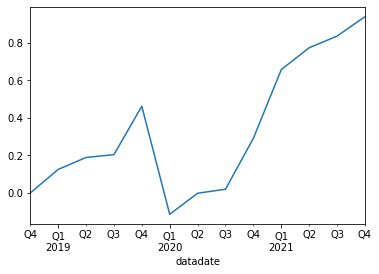

In [18]:
df_boa_cumret_qtr.plot()

**Note that the series above starts at a zero**, and then continues using that zero value as the base reference.

Alternatively, if you want the cumulative returns per quarter, use the **product** (not cumulative product) of the values:

<AxesSubplot:xlabel='datadate'>

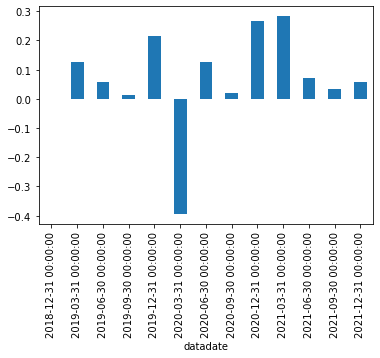

In [19]:
df_boa_ret_qtr = df_boa.resample('Q').prod()-1  
df_boa_ret_qtr.plot(kind='bar')

**Year-ends not December**

Pandas takes the approach shown above a step further by allowing you to set your own quarter/year-end. 

For example, if you want annual observations, you can specify the relevant year-end, be it December or April. See this Pandas [help-file](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
for a wealth of time-series features. 

<AxesSubplot:xlabel='datadate'>

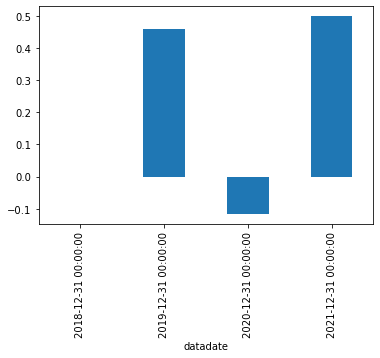

In [20]:
# Annual - generic
df_boa_ret_ann = df_boa.resample('A').prod()-1  
df_boa_ret_ann.plot(kind='bar')

<AxesSubplot:xlabel='datadate'>

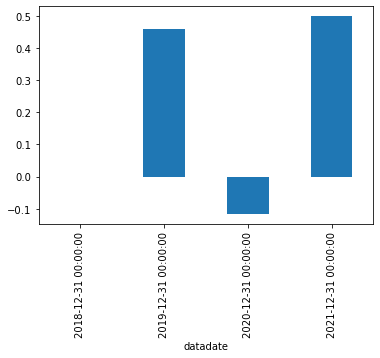

In [21]:
# Annual - December
df_boa_ret_ann = df_boa.resample('A-DEC').prod()-1  
df_boa_ret_ann.plot(kind='bar')

<AxesSubplot:xlabel='datadate'>

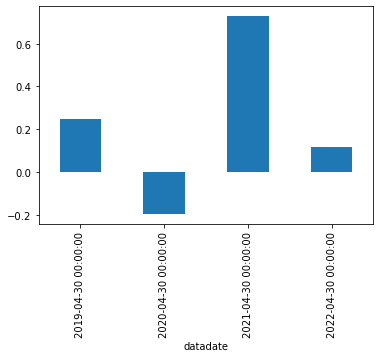

In [22]:
# Annual - April
df_boa_ret_ann = df_boa.resample('A-APR').prod()-1  
df_boa_ret_ann.plot(kind='bar')

---

**Applying the same logic for all banks**

We generally work with panel data. So, instead of lifting the data from a single firm, we should be able to apply the same approach to all banks in our data frame `dfm`. This involves the use of `groupby`, see also [Session 6](https://github.com/blucap/EEA_Python_Primer/blob/master/assignment_1_solutions.ipynb).

- Let's add a variable `dprc` to our main data frame `dfm`
- Then get rid of rows without valid value change observations

In [23]:
dfm['dprc'] = dfm['prc'].groupby('ticker').pct_change() + 1
dfm['dprc'].head()

ticker  datadate  
AAIC    2018-12-31         NaN
        2019-01-02    1.009669
        2019-01-03    1.000000
        2019-01-04    1.041040
        2019-01-07    1.040736
Name: dprc, dtype: float64

In [24]:
dfm.dropna(subset = ['dprc'], inplace=True)  
dfm['dprc'].head()

ticker  datadate  
AAIC    2019-01-02    1.009669
        2019-01-03    1.000000
        2019-01-04    1.041040
        2019-01-07    1.040736
        2019-01-08    1.010101
Name: dprc, dtype: float64

**Presto!**

The next cells show how this approach works for three banks (Bank of America, Well Fargo, Citi). This instead of testing this for all banks.

In [25]:
# Obtain the price-change data (with 1 added) for Bank of America, Well Fargo, Citi:
df_3_bks = dfm['dprc'].loc[['BAC', 'WFC', 'C']]
df_3_bks

ticker  datadate  
BAC     2019-01-02    1.012987
        2019-01-03    0.983974
        2019-01-04    1.041531
        2019-01-07    0.999218
        2019-01-08    0.998044
                        ...   
C       2021-12-22    1.003705
        2021-12-23    1.010235
        2021-12-27    1.007308
        2021-12-28    0.999505
        2021-12-29    0.998680
Name: dprc, Length: 2265, dtype: float64

In [26]:
# Reshaping the melted data using unstack
df_3_bks = dfm['dprc'].loc[['BAC', 'WFC', 'C']].unstack()
df_3_bks

datadate,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2021-12-15,2021-12-16,2021-12-17,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-27,2021-12-28,2021-12-29
ticker,,,,,,,,,,,,,,,,,,,,,
BAC,1.012987,0.983974,1.041531,0.999218,0.998044,1.009800,0.998835,1.011660,1.013062,1.006826,...,0.995694,1.024124,0.975111,0.983592,1.023865,1.002037,1.003162,1.004953,1.001344,0.998434
WFC,1.018663,0.992118,1.029633,0.993535,0.997901,1.005469,0.998954,1.002513,1.011490,0.984510,...,1.001023,1.027789,0.953280,0.977059,1.020491,1.004601,1.006871,1.008478,0.992823,1.000620
C,1.028237,0.981879,1.048897,1.008707,0.997303,1.016589,1.001064,1.004430,1.039513,1.041575,...,0.993404,1.013778,0.974947,0.978838,1.018874,1.003705,1.010235,1.007308,0.999505,0.998680


In [27]:
# Better to transpose (T) the frame and eliminate empty rows
df_3_bks = dfm['dprc'].loc[['BAC', 'WFC', 'C']].unstack().T.dropna(how = 'all')
df_3_bks

ticker,BAC,WFC,C
datadate,,,
2019-01-02,1.012987,1.018663,1.028237
2019-01-03,0.983974,0.992118,0.981879
2019-01-04,1.041531,1.029633,1.048897
2019-01-07,0.999218,0.993535,1.008707
2019-01-08,0.998044,0.997901,0.997303
...,...,...,...
2021-12-22,1.002037,1.004601,1.003705
2021-12-23,1.003162,1.006871,1.010235
2021-12-27,1.004953,1.008478,1.007308


<AxesSubplot:xlabel='datadate'>

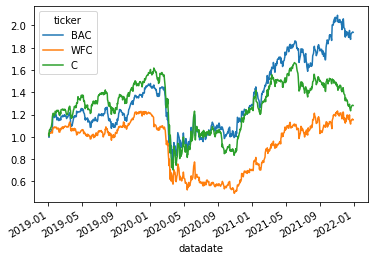

In [28]:
df_3_bks.cumprod().plot()

---

Likewise, if you want the cumulative returns per quarter:

- Create a group object which groups on `['ticker', 'quarter']`.
- Calculate the cumulative returns per quarter using Pandas product function, then deduct 1.
- If we want to: reshape the resulting frame and plot.

In [29]:
dfm_qtr_qp = dfm.groupby(['ticker', 'quarter'])
dfm_qtr_qp.head()

prc  year  quarter_no quarter      dprc
ticker datadate                                                 
AAIC   2019-01-02   6.234708  2019           1  2019Q1  1.009669
       2019-01-03   6.234708  2019           1  2019Q1  1.000000
       2019-01-04   6.490578  2019           1  2019Q1  1.041040
       2019-01-07   6.754978  2019           1  2019Q1  1.040736
       2019-01-08   6.823210  2019           1  2019Q1  1.010101
...                      ...   ...         ...     ...       ...
ZION   2021-10-01  63.650002  2021           4  2021Q4  1.028438
       2021-10-04  63.799999  2021           4  2021Q4  1.002357
       2021-10-05  63.459999  2021           4  2021Q4  0.994671
       2021-10-06  62.799999  2021           4  2021Q4  0.989600
       2021-10-07  63.070000  2021           4  2021Q4  1.004299

[18838 rows x 5 columns]

In [30]:
df_all_bks = dfm_qtr_qp['dprc'].prod() - 1
df_all_bks.head(5)

ticker  quarter
AAIC    2019Q1     0.151604
        2019Q2    -0.135678
        2019Q3    -0.140963
        2019Q4     0.054940
        2020Q1    -0.606822
Name: dprc, dtype: float64

In [31]:
#Check for Bank of America
df_all_bks.loc['BAC']

quarter
2019Q1    0.125441
2019Q2    0.056785
2019Q3    0.012492
2019Q4    0.213997
2020Q1   -0.393371
2020Q2    0.126502
2020Q3    0.021381
2020Q4    0.266040
2021Q1    0.282817
2021Q2    0.070136
2021Q3    0.034866
2021Q4    0.056415
Freq: Q-DEC, Name: dprc, dtype: float64

In [32]:
df_all_bks[['BAC', 'WFC', 'C']].unstack()

quarter,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4
ticker,,,,,,,,,,,,
BAC,0.125441,0.056785,0.012492,0.213997,-0.393371,0.126502,0.021381,0.266040,0.282817,0.070136,0.034866,0.056415
WFC,0.058117,-0.011228,0.077935,0.076822,-0.460851,-0.089890,-0.077861,0.289603,0.298663,0.161730,0.029190,0.047987
C,0.203561,0.132767,-0.006150,0.164752,-0.469279,0.226077,-0.147816,0.448021,0.189915,-0.020728,-0.000650,-0.131109


In [81]:
#df_all_bks[['BAC', 'WFC', 'C']].unstack().T.plot(kind = 'bar', figsize = (10,6))
#df_all_bks

In [34]:
# Note, `df_all_bks`is a Pandas **Series**. Best to convert it to a frame.

df_all_bks = df_all_bks.to_frame()

In [35]:
df_all_bks.tail(3)

dprc
ticker quarter          
ZION   2021Q2  -0.032591
       2021Q3   0.170829
       2021Q4   0.025206

We now have a data frame with quarterly returns data that we can merge with the Bank Holding Company data.


---
### Accounting data - Loading the Bank Holding Company Data  ###

We now will use the downloaded BHC data, see the top of this notebook, to prepare the accounting data.

The function below relies on [Assignment 1](https://github.com/blucap/EEA_Python_Primer/blob/master/assignment_1_solutions.ipynb). It sorts out the accounting data in one go.

In [89]:
def load_bhc_data():
    mdrm = {'RSSD9999': 'REPORTING DATE',
            'RSSD9001': 'Borrower RSSD ID',
            'RSSD9010': 'Entity Short Name',
            'BHCK3210': 'Total Equity Capital',
            'BHCK2170': 'Total Assets',
            'BHCK4340': 'Net Income'}
    var_list = [key for key, value in mdrm.items()]
    df = pd.DataFrame()
    for fname in glob.glob('BHCF*.ZIP'):
        print(fname)
        df = df.append(pd.read_csv(fname, sep='^', encoding="ISO-8859-1", low_memory=False))
    df = df[var_list]
    # Create a date variable that matches the price data panel.
    df['datadate'] = pd.to_datetime(df['RSSD9999'], format = '%Y%m%d')
    df.set_index(['RSSD9001' , 'datadate'], inplace=True)
    # Get rid of rows without the relevant accounting data:
    df.dropna(subset = [x for x in df if x.startswith('BHCK')], inplace=True)
    print(f'\nDone!\n\nTotal rows in data frame: {len(df)}')
    print(f'Total variables in data frame: {len(list(df))}\n')
    df.sort_index(inplace = True) # sort along the index
    return df, mdrm

df, mdrm = load_bhc_data()

BHCF20190331.ZIP
BHCF20190630.ZIP
BHCF20190930.ZIP
BHCF20191231.ZIP
BHCF20200331.ZIP
BHCF20200630.ZIP
BHCF20200930.ZIP
BHCF20201231.ZIP
BHCF20210331.ZIP
BHCF20210630.ZIP
BHCF20210930.ZIP
BHCF20211231.ZIP

Done!

Total rows in data frame: 3878
Total variables in data frame: 5



In [84]:
df.head(3)

RSSD9999          RSSD9010   BHCK3210    BHCK2170  \
RSSD9001 datadate                                                        
1020180  2019-03-31  20190331  BREMER FNCL CORP  1166464.0  12623882.0   
         2019-06-30  20190630  BREMER FNCL CORP  1211344.0  12745024.0   
         2019-09-30  20190930  BREMER FNCL CORP  1252940.0  13114874.0   

                     BHCK4340  
RSSD9001 datadate              
1020180  2019-03-31   35092.0  
         2019-06-30   71501.0  
         2019-09-30  113909.0

In [38]:
df.tail(3)

RSSD9999               RSSD9010  BHCK3210   BHCK2170  \
RSSD9001 datadate                                                           
5559343  2021-03-31  20210331  AMALGAMATED FNCL CORP  540089.0  6390966.0   
         2021-06-30  20210630  AMALGAMATED FNCL CORP  548078.0  6561863.0   
         2021-09-30  20210930  AMALGAMATED FNCL CORP  556257.0  6866397.0   

                     BHCK4340  
RSSD9001 datadate              
5559343  2021-03-31   12189.0  
         2021-06-30   22597.0  
         2021-09-30   37013.0

---
#### Adding the ticker codes from file ####

The next cells 

- load a file from disk that allows you to link the bank ids `RSSD9001` to the `ticker` data,
- join that data with data frame `df`. To perform this join, we should reset the index and set it to match on ticker and date,
- eliminate rows without ticker,
- and finally resets the index to its previous state, with index `['RSSD9001', 'datadate']`.

In [90]:
dft_r = pd.read_csv('ticker_rssd.csv').set_index(['RSSD9001'])

In [86]:
dft_r.head()

,ticker
RSSD9001,
1082067,ABCB
3744239,ABTX
1076691,AMNB
2433312,AMP
1135972,AMTBB


In [91]:
df = df.reset_index().set_index(['RSSD9001']).join(dft_r).dropna(subset=['ticker'])
df.head()

,datadate,RSSD9999,RSSD9010,BHCK3210,BHCK2170,BHCK4340,ticker
RSSD9001,,,,,,,
1022764,2019-03-31,20190331,CENTRAL PACIFIC FC,502638.0,5841352.0,16037.0,CPF
1022764,2019-06-30,20190630,CENTRAL PACIFIC FC,515695.0,5920006.0,29571.0,CPF
1022764,2019-09-30,20190930,CENTRAL PACIFIC FC,525227.0,5976716.0,44125.0,CPF
1022764,2019-12-31,20191231,CENTRAL PACIFIC FC,528520.0,6012672.0,58322.0,CPF
1022764,2020-03-31,20200331,CENTRAL PACIFIC FC,533781.0,6108548.0,8326.0,CPF


In [92]:
df = df.reset_index().set_index(['RSSD9001', 'datadate'])
df.head(3)

RSSD9999            RSSD9010  BHCK3210   BHCK2170  \
RSSD9001 datadate                                                        
1022764  2019-03-31  20190331  CENTRAL PACIFIC FC  502638.0  5841352.0   
         2019-06-30  20190630  CENTRAL PACIFIC FC  515695.0  5920006.0   
         2019-09-30  20190930  CENTRAL PACIFIC FC  525227.0  5976716.0   

                     BHCK4340 ticker  
RSSD9001 datadate                     
1022764  2019-03-31   16037.0    CPF  
         2019-06-30   29571.0    CPF  
         2019-09-30   44125.0    CPF

We now have a neat data frame which we can use for panel data analysis.

However, sometimes we may want to use lagged data.

Unlike with Stata, which creates lagged data with ease, Pandas requires a bit more work. However, this is really doable.

---

### Lagging, leading, ... shifting  ###

The Pandas way of creating lagged data is by way of `shift`. This command plays tricks with the index, which ideally should be a Datetime Index.

Let's try it for Bank of America (you guessed it right, I am an account holder of that bank).


In [87]:
boa = df.loc[1073757] # Which leaves datadate as the index - clever!
boa.head(3)

,RSSD9999,RSSD9010,BHCK3210,BHCK2170,BHCK4340
datadate,,,,,
2019-03-31,20190331,BANK OF AMER CORP,267010000.0,2.377362e+09,7311000.0
2019-06-30,20190630,BANK OF AMER CORP,271408000.0,2.396484e+09,14659000.0
2019-09-30,20190930,BANK OF AMER CORP,268387000.0,2.426330e+09,20436000.0


In [44]:
# Check if the index is indeed a DatetimeIndex 
boa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2019-03-31 to 2021-09-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RSSD9999  11 non-null     int64  
 1   RSSD9010  11 non-null     object 
 2   BHCK3210  11 non-null     float64
 3   BHCK2170  11 non-null     float64
 4   BHCK4340  11 non-null     float64
 5   ticker    11 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 616.0+ bytes


Now do the shift:

In [45]:
boa.shift(3)

,RSSD9999,RSSD9010,BHCK3210,BHCK2170,BHCK4340,ticker
datadate,,,,,,
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,20190331.0,BANK OF AMER CORP,267010000.0,2.377362e+09,7311000.0,BAC
2020-03-31,20190630.0,BANK OF AMER CORP,271408000.0,2.396484e+09,14659000.0,BAC
2020-06-30,20190930.0,BANK OF AMER CORP,268387000.0,2.426330e+09,20436000.0,BAC
2020-09-30,20191231.0,BANK OF AMER CORP,264810000.0,2.434079e+09,27430000.0,BAC
2020-12-31,20200331.0,BANK OF AMER CORP,264918000.0,2.619954e+09,4010000.0,BAC
2021-03-31,20200630.0,BANK OF AMER CORP,265637000.0,2.741688e+09,7543000.0,BAC


The result is not entirely compelling. Yes, the data is shifted by three rows, but we end up with some empty cells. Moreover, this approach may lead to problems if we apply this to the entire frame, it may lead to data being shifted to rows that 'belong' to the wrong dates or banks.   

It is better to tell Pandas the proper offset, e.g. in months.

In [46]:
# Do the shift for three months 
boa.shift(3, freq = 'M')

,RSSD9999,RSSD9010,BHCK3210,BHCK2170,BHCK4340,ticker
datadate,,,,,,
2019-06-30,20190331,BANK OF AMER CORP,267010000.0,2.377362e+09,7311000.0,BAC
2019-09-30,20190630,BANK OF AMER CORP,271408000.0,2.396484e+09,14659000.0,BAC
2019-12-31,20190930,BANK OF AMER CORP,268387000.0,2.426330e+09,20436000.0,BAC
2020-03-31,20191231,BANK OF AMER CORP,264810000.0,2.434079e+09,27430000.0,BAC
2020-06-30,20200331,BANK OF AMER CORP,264918000.0,2.619954e+09,4010000.0,BAC
2020-09-30,20200630,BANK OF AMER CORP,265637000.0,2.741688e+09,7543000.0,BAC
2020-12-31,20200930,BANK OF AMER CORP,268850000.0,2.738452e+09,12424000.0,BAC
2021-03-31,20201231,BANK OF AMER CORP,272924000.0,2.819627e+09,17894000.0,BAC
2021-06-30,20210331,BANK OF AMER CORP,274000000.0,2.969992e+09,8050000.0,BAC


You can see that data from 20190930 (September) now has a time stamp of 2019-12-31 (December). 

This is great! We can use the shifted data and join it with the main data frame. The resulting data frame will have a set of lagged variables.

**Now let's apply this for the entire data frame:**

**Step 1**: make sure we set the proper (Datetime) Index

In [93]:
df = df.reset_index().set_index(['datadate'])
df.head(3)

,RSSD9001,RSSD9999,RSSD9010,BHCK3210,BHCK2170,BHCK4340,ticker
datadate,,,,,,,
2019-03-31,1022764,20190331,CENTRAL PACIFIC FC,502638.0,5841352.0,16037.0,CPF
2019-06-30,1022764,20190630,CENTRAL PACIFIC FC,515695.0,5920006.0,29571.0,CPF
2019-09-30,1022764,20190930,CENTRAL PACIFIC FC,525227.0,5976716.0,44125.0,CPF


**Step 2**: group by bank (`RSSD9001`) and apply `shift` to the accounting variables only: Equity, Total Assets, Net Income (`BHCK3210`, `BHCK2170`, `BHCK4340`). 

Assign the result to a data frame `df_lag`.

In [94]:
df_lag = df.groupby(['RSSD9001'])[['BHCK3210', 'BHCK2170', 'BHCK4340']].shift(3, freq = 'M')
df_lag.head()

BHCK3210   BHCK2170  BHCK4340
RSSD9001 datadate                                 
1022764  2019-06-30  502638.0  5841352.0   16037.0
         2019-09-30  515695.0  5920006.0   29571.0
         2019-12-31  525227.0  5976716.0   44125.0
         2020-03-31  528520.0  6012672.0   58322.0
         2020-06-30  533781.0  6108548.0    8326.0

In [49]:
# Compare to
df[['BHCK3210', 'BHCK2170', 'BHCK4340']].head()

,BHCK3210,BHCK2170,BHCK4340
datadate,,,
2019-03-31,502638.0,5841352.0,16037.0
2019-06-30,515695.0,5920006.0,29571.0
2019-09-30,525227.0,5976716.0,44125.0
2019-12-31,528520.0,6012672.0,58322.0
2020-03-31,533781.0,6108548.0,8326.0


**Step 3**: join both frames, and use `_lag` as a suffix, to properly name the variables.

But first reset the index of the main data frame to `['RSSD9001', 'datadate']`. Else we cannot join on the two dimensions.
    

In [50]:
df = df.reset_index().set_index(['RSSD9001', 'datadate'])
dfj = df.join(df_lag, rsuffix='_lag')
dfj.head()

RSSD9999            RSSD9010  BHCK3210   BHCK2170  \
RSSD9001 datadate                                                        
1022764  2019-03-31  20190331  CENTRAL PACIFIC FC  502638.0  5841352.0   
         2019-06-30  20190630  CENTRAL PACIFIC FC  515695.0  5920006.0   
         2019-09-30  20190930  CENTRAL PACIFIC FC  525227.0  5976716.0   
         2019-12-31  20191231  CENTRAL PACIFIC FC  528520.0  6012672.0   
         2020-03-31  20200331  CENTRAL PACIFIC FC  533781.0  6108548.0   

                     BHCK4340 ticker  BHCK3210_lag  BHCK2170_lag  BHCK4340_lag  
RSSD9001 datadate                                                               
1022764  2019-03-31   16037.0    CPF           NaN           NaN           NaN  
         2019-06-30   29571.0    CPF      502638.0     5841352.0       16037.0  
         2019-09-30   44125.0    CPF      515695.0     5920006.0       29571.0  
         2019-12-31   58322.0    CPF      525227.0     5976716.0       44125.0  
         2020-03-31    8326.0    CPF      528520.0     6012672.0       58322.0

---
#### Consolidating the process of shifting in a few rows:

The cell below summarizes the process of loading that, adding the tickers, and shifting in a few lines:

In [95]:
# Prepare the main data
# Load the data
df, mdrm = load_bhc_data()
# Load the tickers
dft_r = pd.read_csv('ticker_rssd.csv').set_index(['RSSD9001'])
# join the tickers
df = df.reset_index().set_index(['RSSD9001']).join(dft_r).dropna(subset=['ticker'])
# set the index
df = df.reset_index().set_index(['RSSD9001', 'datadate'])

# Do the shift - create and add lagged variables
df_lag = df.reset_index().set_index(['datadate']).groupby(['RSSD9001'])[['BHCK3210', 'BHCK2170', 'BHCK4340']].shift(3, freq = 'M')

dfj = df.join(df_lag, rsuffix='_lag')

BHCF20190331.ZIP
BHCF20190630.ZIP
BHCF20190930.ZIP
BHCF20191231.ZIP
BHCF20200331.ZIP
BHCF20200630.ZIP
BHCF20200930.ZIP
BHCF20201231.ZIP
BHCF20210331.ZIP
BHCF20210630.ZIP
BHCF20210930.ZIP
BHCF20211231.ZIP

Done!

Total rows in data frame: 3878
Total variables in data frame: 5



In [96]:
len(dfj)

2607

In [97]:
dfj.head(8)

RSSD9999            RSSD9010  BHCK3210   BHCK2170  \
RSSD9001 datadate                                                        
1022764  2019-03-31  20190331  CENTRAL PACIFIC FC  502638.0  5841352.0   
         2019-06-30  20190630  CENTRAL PACIFIC FC  515695.0  5920006.0   
         2019-09-30  20190930  CENTRAL PACIFIC FC  525227.0  5976716.0   
         2019-12-31  20191231  CENTRAL PACIFIC FC  528520.0  6012672.0   
         2020-03-31  20200331  CENTRAL PACIFIC FC  533781.0  6108548.0   
         2020-06-30  20200630  CENTRAL PACIFIC FC  544271.0  6632972.0   
         2020-09-30  20200930  CENTRAL PACIFIC FC  543903.0  6648142.0   
         2020-12-31  20201231  CENTRAL PACIFIC FC  546685.0  6594583.0   

                     BHCK4340 ticker  BHCK3210_lag  BHCK2170_lag  BHCK4340_lag  
RSSD9001 datadate                                                               
1022764  2019-03-31   16037.0    CPF           NaN           NaN           NaN  
         2019-06-30   29571.0    CPF      502638.0     5841352.0       16037.0  
         2019-09-30   44125.0    CPF      515695.0     5920006.0       29571.0  
         2019-12-31   58322.0    CPF      525227.0     5976716.0       44125.0  
         2020-03-31    8326.0    CPF      528520.0     6012672.0       58322.0  
         2020-06-30   18243.0    CPF      533781.0     6108548.0        8326.0  
         2020-09-30   25102.0    CPF      544271.0     6632972.0       18243.0  
         2020-12-31   37273.0    CPF      543903.0     6648142.0       25102.0

---
#### Create a Return on Equity variable ####

With the data frame in good shape we can calculate a column for Return on Equity, which uses the average equity value as denominator (`mu_equity`):


In [54]:
dfj['mu_equity'] = dfj[['BHCK3210', 'BHCK3210_lag']].mean(axis=1, skipna=False)

dfj['roe']  = dfj['BHCK4340'] / dfj['mu_equity']

roe = dfj['roe'].groupby('datadate').mean()
roe

datadate
2019-03-31         NaN
2019-06-30    0.050829
2019-09-30    0.076703
2019-12-31    0.099845
2020-03-31    0.006044
2020-06-30    0.018471
2020-09-30    0.041842
2020-12-31    0.068775
2021-03-31    0.032561
2021-06-30    0.064066
2021-09-30    0.093840
Name: roe, dtype: float64

<AxesSubplot:xlabel='datadate'>

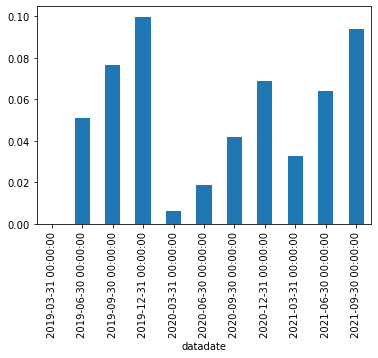

In [55]:
roe.plot(kind= 'bar')

<AxesSubplot:xlabel='datadate'>

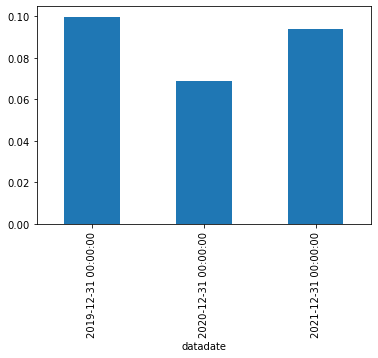

In [56]:
roe.resample('A-DEC').last().plot(kind = 'bar')

<AxesSubplot:xlabel='datadate'>

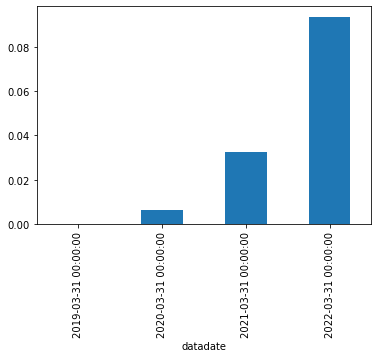

In [57]:
roe.resample('A-MAR').last().plot(kind = 'bar')

---

Note that the ROE data cumulates over the year, thus not showing the true quarterly data.

We can solve this by 

- taking the difference in net income `BHCK4340` per year, bank. Then store the differences in a separate data frame (`dfo`), in a separate column `BHCK4340_q`;
- join that data frame with the main frame (`dfj`);
- then add the first quarter values of `BHCK4340` to `BHCK4340_q`
- then create a new `roe` column.

To make this work we first need some new columns in `dfj`: `year`, and `quarter_no`.



In [58]:
# Add `year`, and `quarter_no` to dfj
dfj.reset_index(inplace=True)
dfj['year'] = dfj.datadate.dt.year
dfj['quarter_no'] = dfj.datadate.dt.quarter
dfj['quarter'] = pd.PeriodIndex(dfj['datadate'], freq='Q') # Let's do this one as well 
dfj.set_index(['RSSD9001', 'datadate'], inplace = True)

In [59]:
dfj.tail(8)

RSSD9999             RSSD9010   BHCK3210    BHCK2170  \
RSSD9001 datadate                                                           
4882802  2020-06-30  20200630           CADENCE BC  2045480.0  18857913.0   
         2020-09-30  20200930           CADENCE BC  2071472.0  18404901.0   
         2020-12-31  20201231           CADENCE BC  2121102.0  18712611.0   
         2021-03-31  20210331           CADENCE BC  2092536.0  18800692.0   
         2021-06-30  20210630           CADENCE BC  2202738.0  18693074.0   
         2021-09-30  20210930           CADENCE BC  2182088.0  19754661.0   
4973362  2019-03-31  20190331  HARBORONE MUT BSHRS   363548.0   3660165.0   
         2019-06-30  20190630  HARBORONE MUT BSHRS   371218.0   3742941.0   

                     BHCK4340 ticker  BHCK3210_lag  BHCK2170_lag  \
RSSD9001 datadate                                                  
4882802  2020-06-30 -455425.0   CADE     2113543.0    17238043.0   
         2020-09-30 -406110.0   CADE     2045480.0    18857913.0   
         2020-12-31 -205527.0   CADE     2071472.0    18404901.0   
         2021-03-31  106425.0   CADE     2121102.0    18712611.0   
         2021-06-30  207734.0   CADE     2092536.0    18800692.0   
         2021-09-30  291720.0   CADE     2202738.0    18693074.0   
4973362  2019-03-31    2067.0   HONE           NaN           NaN   
         2019-06-30    6848.0   HONE      363548.0     3660165.0   

                     BHCK4340_lag  mu_equity       roe  year  quarter_no  \
RSSD9001 datadate                                                          
4882802  2020-06-30     -399311.0  2079511.5 -0.219006  2020           2   
         2020-09-30     -455425.0  2058476.0 -0.197287  2020           3   
         2020-12-31     -406110.0  2096287.0 -0.098043  2020           4   
         2021-03-31     -205527.0  2106819.0  0.050515  2021           1   
         2021-06-30      106425.0  2147637.0  0.096727  2021           2   
         2021-09-30      207734.0  2192413.0  0.133059  2021           3   
4973362  2019-03-31           NaN        NaN       NaN  2019           1   
         2019-06-30        2067.0   367383.0  0.018640  2019           2   

                    quarter  
RSSD9001 datadate            
4882802  2020-06-30  2020Q2  
         2020-09-30  2020Q3  
         2020-12-31  2020Q4  
         2021-03-31  2021Q1  
         2021-06-30  2021Q2  
         2021-09-30  2021Q3  
4973362  2019-03-31  2019Q1  
         2019-06-30  2019Q2

In [60]:
# using diff to create first differences by bank and year
dfo = dfj.groupby(['RSSD9010', 'year'])['BHCK4340'].diff(1).to_frame()
dfo

BHCK4340
RSSD9001 datadate            
1022764  2019-03-31       NaN
         2019-06-30   13534.0
         2019-09-30   14554.0
         2019-12-31   14197.0
         2020-03-31       NaN
...                       ...
4882802  2021-03-31       NaN
         2021-06-30  101309.0
         2021-09-30   83986.0
4973362  2019-03-31       NaN
         2019-06-30    4781.0

[2607 rows x 1 columns]

In [61]:
# Join dfo with dfj
dfj = dfj.join(dfo, rsuffix='_q')

In [62]:
dfj.head(8)

RSSD9999            RSSD9010  BHCK3210   BHCK2170  \
RSSD9001 datadate                                                        
1022764  2019-03-31  20190331  CENTRAL PACIFIC FC  502638.0  5841352.0   
         2019-06-30  20190630  CENTRAL PACIFIC FC  515695.0  5920006.0   
         2019-09-30  20190930  CENTRAL PACIFIC FC  525227.0  5976716.0   
         2019-12-31  20191231  CENTRAL PACIFIC FC  528520.0  6012672.0   
         2020-03-31  20200331  CENTRAL PACIFIC FC  533781.0  6108548.0   
         2020-06-30  20200630  CENTRAL PACIFIC FC  544271.0  6632972.0   
         2020-09-30  20200930  CENTRAL PACIFIC FC  543903.0  6648142.0   
         2020-12-31  20201231  CENTRAL PACIFIC FC  546685.0  6594583.0   

                     BHCK4340 ticker  BHCK3210_lag  BHCK2170_lag  \
RSSD9001 datadate                                                  
1022764  2019-03-31   16037.0    CPF           NaN           NaN   
         2019-06-30   29571.0    CPF      502638.0     5841352.0   
         2019-09-30   44125.0    CPF      515695.0     5920006.0   
         2019-12-31   58322.0    CPF      525227.0     5976716.0   
         2020-03-31    8326.0    CPF      528520.0     6012672.0   
         2020-06-30   18243.0    CPF      533781.0     6108548.0   
         2020-09-30   25102.0    CPF      544271.0     6632972.0   
         2020-12-31   37273.0    CPF      543903.0     6648142.0   

                     BHCK4340_lag  mu_equity       roe  year  quarter_no  \
RSSD9001 datadate                                                          
1022764  2019-03-31           NaN        NaN       NaN  2019           1   
         2019-06-30       16037.0   509166.5  0.058077  2019           2   
         2019-09-30       29571.0   520461.0  0.084781  2019           3   
         2019-12-31       44125.0   526873.5  0.110695  2019           4   
         2020-03-31       58322.0   531150.5  0.015675  2020           1   
         2020-06-30        8326.0   539026.0  0.033844  2020           2   
         2020-09-30       18243.0   544087.0  0.046136  2020           3   
         2020-12-31       25102.0   545294.0  0.068354  2020           4   

                    quarter  BHCK4340_q  
RSSD9001 datadate                        
1022764  2019-03-31  2019Q1         NaN  
         2019-06-30  2019Q2     13534.0  
         2019-09-30  2019Q3     14554.0  
         2019-12-31  2019Q4     14197.0  
         2020-03-31  2020Q1         NaN  
         2020-06-30  2020Q2      9917.0  
         2020-09-30  2020Q3      6859.0  
         2020-12-31  2020Q4     12171.0

In [63]:
# For first quarter rows, copy the values from BHCK4340 to BHCK4340_q
dfj.loc[dfj["quarter_no"]==1,'BHCK4340_q'] = dfj.loc[dfj["quarter_no"]==1,'BHCK4340'] 
dfj

RSSD9999             RSSD9010   BHCK3210    BHCK2170  \
RSSD9001 datadate                                                           
1022764  2019-03-31  20190331   CENTRAL PACIFIC FC   502638.0   5841352.0   
         2019-06-30  20190630   CENTRAL PACIFIC FC   515695.0   5920006.0   
         2019-09-30  20190930   CENTRAL PACIFIC FC   525227.0   5976716.0   
         2019-12-31  20191231   CENTRAL PACIFIC FC   528520.0   6012672.0   
         2020-03-31  20200331   CENTRAL PACIFIC FC   533781.0   6108548.0   
...                       ...                  ...        ...         ...   
4882802  2021-03-31  20210331           CADENCE BC  2092536.0  18800692.0   
         2021-06-30  20210630           CADENCE BC  2202738.0  18693074.0   
         2021-09-30  20210930           CADENCE BC  2182088.0  19754661.0   
4973362  2019-03-31  20190331  HARBORONE MUT BSHRS   363548.0   3660165.0   
         2019-06-30  20190630  HARBORONE MUT BSHRS   371218.0   3742941.0   

                     BHCK4340 ticker  BHCK3210_lag  BHCK2170_lag  \
RSSD9001 datadate                                                  
1022764  2019-03-31   16037.0    CPF           NaN           NaN   
         2019-06-30   29571.0    CPF      502638.0     5841352.0   
         2019-09-30   44125.0    CPF      515695.0     5920006.0   
         2019-12-31   58322.0    CPF      525227.0     5976716.0   
         2020-03-31    8326.0    CPF      528520.0     6012672.0   
...                       ...    ...           ...           ...   
4882802  2021-03-31  106425.0   CADE     2121102.0    18712611.0   
         2021-06-30  207734.0   CADE     2092536.0    18800692.0   
         2021-09-30  291720.0   CADE     2202738.0    18693074.0   
4973362  2019-03-31    2067.0   HONE           NaN           NaN   
         2019-06-30    6848.0   HONE      363548.0     3660165.0   

                     BHCK4340_lag  mu_equity       roe  year  quarter_no  \
RSSD9001 datadate                                                          
1022764  2019-03-31           NaN        NaN       NaN  2019           1   
         2019-06-30       16037.0   509166.5  0.058077  2019           2   
         2019-09-30       29571.0   520461.0  0.084781  2019           3   
         2019-12-31       44125.0   526873.5  0.110695  2019           4   
         2020-03-31       58322.0   531150.5  0.015675  2020           1   
...                           ...        ...       ...   ...         ...   
4882802  2021-03-31     -205527.0  2106819.0  0.050515  2021           1   
         2021-06-30      106425.0  2147637.0  0.096727  2021           2   
         2021-09-30      207734.0  2192413.0  0.133059  2021           3   
4973362  2019-03-31           NaN        NaN       NaN  2019           1   
         2019-06-30        2067.0   367383.0  0.018640  2019           2   

                    quarter  BHCK4340_q  
RSSD9001 datadate                        
1022764  2019-03-31  2019Q1     16037.0  
         2019-06-30  2019Q2     13534.0  
         2019-09-30  2019Q3     14554.0  
         2019-12-31  2019Q4     14197.0  
         2020-03-31  2020Q1      8326.0  
...                     ...         ...  
4882802  2021-03-31  2021Q1    106425.0  
         2021-06-30  2021Q2    101309.0  
         2021-09-30  2021Q3     83986.0  
4973362  2019-03-31  2019Q1      2067.0  
         2019-06-30  2019Q2      4781.0  

[3475 rows x 15 columns]

In [64]:
dfj['roe_improved'] = dfj['BHCK4340_q'] / dfj['mu_equity']
dfj['roe_improved']

RSSD9001  datadate  
1022764   2019-03-31         NaN
          2019-06-30    0.026581
          2019-09-30    0.027964
          2019-12-31    0.026946
          2020-03-31    0.015675
                          ...   
4882802   2021-03-31    0.050515
          2021-06-30    0.047172
          2021-09-30    0.038308
4973362   2019-03-31         NaN
          2019-06-30    0.013014
Name: roe_improved, Length: 3475, dtype: float64

<AxesSubplot:xlabel='datadate'>

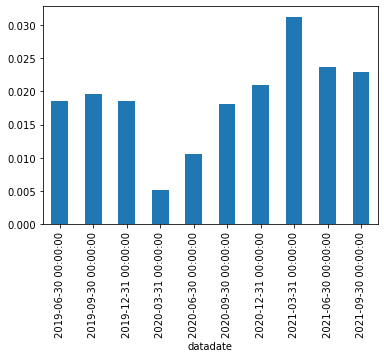

In [65]:
roe_mark2 = dfj['roe_improved']
roe_mark2.groupby('datadate').mean().dropna().plot(kind='bar')

---
### Merging price and accounting data 

The last step of this Session merges the `dfj` frame with accounting data with the price data file `df_all_bks`.

To make this work, we need to reset  the index of `dfj` to `['ticker', 'quarter']`.

In [66]:
dfj = dfj.reset_index().set_index(['ticker', 'quarter'])

In [67]:
df_all_bks.head(3)

dprc
ticker quarter          
AAIC   2019Q1   0.151604
       2019Q2  -0.135678
       2019Q3  -0.140963

In [68]:
dfj.head(3)

RSSD9001   datadate  RSSD9999            RSSD9010  BHCK3210  \
ticker quarter                                                                
CPF    2019Q1    1022764 2019-03-31  20190331  CENTRAL PACIFIC FC  502638.0   
       2019Q2    1022764 2019-06-30  20190630  CENTRAL PACIFIC FC  515695.0   
       2019Q3    1022764 2019-09-30  20190930  CENTRAL PACIFIC FC  525227.0   

                 BHCK2170  BHCK4340  BHCK3210_lag  BHCK2170_lag  BHCK4340_lag  \
ticker quarter                                                                  
CPF    2019Q1   5841352.0   16037.0           NaN           NaN           NaN   
       2019Q2   5920006.0   29571.0      502638.0     5841352.0       16037.0   
       2019Q3   5976716.0   44125.0      515695.0     5920006.0       29571.0   

                mu_equity       roe  year  quarter_no  BHCK4340_q  \
ticker quarter                                                      
CPF    2019Q1         NaN       NaN  2019           1     16037.0   
       2019Q2    509166.5  0.058077  2019           2     13534.0   
       2019Q3    520461.0  0.084781  2019           3     14554.0   

                roe_improved  
ticker quarter                
CPF    2019Q1            NaN  
       2019Q2       0.026581  
       2019Q3       0.027964

In [69]:
dfj = dfj.join(df_all_bks)

In [70]:
dfj

RSSD9001   datadate  RSSD9999     RSSD9010   BHCK3210  \
ticker quarter                                                          
ABCB   2019Q1    1082067 2019-03-31  20190331    AMERIS BC  1495584.0   
       2019Q2    1082067 2019-06-30  20190630    AMERIS BC  1537121.0   
       2019Q3    1082067 2019-09-30  20190930    AMERIS BC  2420723.0   
       2019Q4    1082067 2019-12-31  20191231    AMERIS BC  2469582.0   
       2020Q1    1082067 2020-03-31  20200331    AMERIS BC  2437150.0   
...                  ...        ...       ...          ...        ...   
WTFC   2020Q3    2260406 2020-09-30  20200930  WINTRUST FC  4074089.0   
       2020Q4    2260406 2020-12-31  20201231  WINTRUST FC  4115995.0   
       2021Q1    2260406 2021-03-31  20210331  WINTRUST FC  4252511.0   
       2021Q2    2260406 2021-06-30  20210630  WINTRUST FC  4339011.0   
       2021Q3    2260406 2021-09-30  20210930  WINTRUST FC  4410317.0   

                  BHCK2170  BHCK4340  BHCK3210_lag  BHCK2170_lag  \
ticker quarter                                                     
ABCB   2019Q1   11656275.0   39905.0           NaN           NaN   
       2019Q2   11889460.0   78809.0     1495584.0    11656275.0   
       2019Q3   17764277.0  100193.0     1537121.0    11889460.0   
       2019Q4   18242579.0  161441.0     2420723.0    17764277.0   
       2020Q1   18215784.0   19322.0     2469582.0    18242579.0   
...                    ...       ...           ...           ...   
WTFC   2020Q3   43731064.0  191786.0     3990218.0    43539394.0   
       2020Q4   45080250.0  292990.0     4074089.0    43731064.0   
       2021Q1   45682202.0  153148.0     4115995.0    45080250.0   
       2021Q2   46738448.0  258257.0     4252511.0    45682202.0   
       2021Q3   47832271.0  367394.0     4339011.0    46738448.0   

                BHCK4340_lag  mu_equity       roe  year  quarter_no  \
ticker quarter                                                        
ABCB   2019Q1            NaN        NaN       NaN  2019           1   
       2019Q2        39905.0  1516352.5  0.051973  2019           2   
       2019Q3        78809.0  1978922.0  0.050630  2019           3   
       2019Q4       100193.0  2445152.5  0.066025  2019           4   
       2020Q1       161441.0  2453366.0  0.007876  2020           1   
...                      ...        ...       ...   ...         ...   
WTFC   2020Q3        84471.0  4032153.5  0.047564  2020           3   
       2020Q4       191786.0  4095042.0  0.071547  2020           4   
       2021Q1       292990.0  4184253.0  0.036601  2021           1   
       2021Q2       153148.0  4295761.0  0.060119  2021           2   
       2021Q3       258257.0  4374664.0  0.083982  2021           3   

                BHCK4340_q  roe_improved      dprc  
ticker quarter                                      
ABCB   2019Q1      39905.0           NaN  0.087790  
       2019Q2      38904.0      0.025656  0.143885  
       2019Q3      21384.0      0.010806  0.030706  
       2019Q4      61248.0      0.025049  0.060884  
       2020Q1      19322.0      0.007876 -0.437722  
...                    ...           ...       ...  
WTFC   2020Q3     107315.0      0.026615 -0.075680  
       2020Q4     101204.0      0.024714  0.533444  
       2021Q1     153148.0      0.036601  0.246471  
       2021Q2     105109.0      0.024468  0.001711  
       2021Q3     109137.0      0.024948  0.062674  

[3475 rows x 17 columns]